<a href="https://colab.research.google.com/github/Samikshab99/NYC-Taxi-Duration-Prediction/blob/main/Final_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [106]:
# The rituals!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import datetime as dt
from math import radians, cos, sin, asin, sqrt
from datetime import datetime, timedelta
from math import radians, cos, sin, asin, sqrt
from pandas.tseries.holiday import USFederalHolidayCalendar  
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dataset**

In [108]:
# Loading the csv file containing data
taxi_df = pd.read_csv("/content/drive/MyDrive/NYC Taxi Data.csv")
taxi_df 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373


# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [109]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [110]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


In [111]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


In [112]:
# data cleaning
taxi_df[taxi_df.isna().any(axis=1)] # getting rid of null values
index = taxi_df[ (taxi_df['passenger_count'] == 7) | (taxi_df['passenger_count'] == 8) | (taxi_df['passenger_count'] == 9) | (taxi_df['passenger_count'] == 0)].index
taxi_df.drop(index , inplace=True) # getting rid of outliers in passenger count

In [113]:
# Data Formatting
taxi_df['store_and_fwd_flag'] = taxi_df['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)

In [114]:
# Remove outliers
mean = np.mean(taxi_df['trip_duration'])
print("Mean for Trip Duration is:", mean)

standard_deviation = np.std(taxi_df['trip_duration'])
print("Standard Deviation for Trip Duration is:", standard_deviation)

taxi_df = taxi_df[taxi_df['trip_duration'].between(mean - 2*standard_deviation, mean + 2*standard_deviation, inclusive = True)]
taxi_df.describe()

Mean for Trip Duration is: 959.4638466617166
Standard Deviation for Trip Duration is: 5237.070712268078


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1456476.00,1456476.00,1456476.00,1456476.00,1456476.00,1456476.00,1456476.00,1456476.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,0.01,836.88
std,0.50,1.31,0.07,0.03,0.07,0.04,0.07,658.92
min,1.00,1.00,-121.93,34.36,-121.93,32.18,0.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1073.00
max,2.00,6.00,-61.34,51.88,-61.34,43.92,1.00,11411.00


In [115]:
(taxi_df['trip_duration'] < 30).value_counts()

False    1451732
True        4744
Name: trip_duration, dtype: int64

In [116]:
# Getting rid off trip time less than 30 seconds
index = taxi_df[ (taxi_df['trip_duration'] < 30)].index
taxi_df.drop(index , inplace=True)

In [117]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451732 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1451732 non-null  object 
 1   vendor_id           1451732 non-null  int64  
 2   pickup_datetime     1451732 non-null  object 
 3   dropoff_datetime    1451732 non-null  object 
 4   passenger_count     1451732 non-null  int64  
 5   pickup_longitude    1451732 non-null  float64
 6   pickup_latitude     1451732 non-null  float64
 7   dropoff_longitude   1451732 non-null  float64
 8   dropoff_latitude    1451732 non-null  float64
 9   store_and_fwd_flag  1451732 non-null  int64  
 10  trip_duration       1451732 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 132.9+ MB


# **taxi_df Preprocessing**

In [118]:
#Let`s see places were booked the most using our maps
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in taxi_df.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="purple")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)
display(mapa)

But, we are unable to get any insights or draw conclusions from that. So,we will extract the variable from this is -> "**distance**" and "**speed**".

In [119]:
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

#    Applying the above details and creating the feature ‘distance’
taxi_df['distance'] = taxi_df.apply(lambda x: cal_distance 
                              (x['pickup_latitude'],x['pickup_longitude'],
                               x['dropoff_latitude'],x['dropoff_longitude'] ),
                               axis=1)

#Calculation of SPEED in KM per Hour
taxi_df['speed'] = (taxi_df.distance/(taxi_df.trip_duration/3600))

In [120]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,455,1.50,11.86
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,663,1.81,9.80
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,2124,6.39,10.82
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,429,1.49,12.47
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,435,1.19,9.84


### **Euclidean Distance**
Euclidean distance is calculated as the hypotenuse of a right triangle, just like in the Pythagorean theorem. This is simply a direct path from point A to point B. In the image below, this would be the black line. The euclidean distance is roughly 1,417 miles. Although not perfect, this may be a good estimate for flight distance.
### **The Haversine (or great circle)**
The distance is the angular distance between two points on the surface of a sphere. The first coordinate of each point is assumed to be the latitude, the second is the longitude, given in radians.
### **BEARING AND DISTANCES**
Bearing can be defined as the clockwise angular movement between two distant places.
### **Manhattan Distance**
The distance between two points measured along axes at right angles. In a plane with p1 at (x1, y1) and p2 at (x2, y2), it is |x1 - x2| + |y1 - y2|. This method has its problems but could be a good estimate in grid-based cities.

In [121]:
# 1 Haversine Distance
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# 2 Bearing Distance 
def bearing_direction(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

# 3 Manhattan Distance
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

In [122]:
taxi_df.loc[:, 'direction'] = bearing_direction(taxi_df['pickup_latitude'].values, taxi_df['pickup_longitude'].values, taxi_df['dropoff_latitude'].values, taxi_df['dropoff_longitude'].values)
taxi_df.loc[:, 'distance_haversine'] = haversine_distance(taxi_df['pickup_latitude'].values, taxi_df['pickup_longitude'].values, taxi_df['dropoff_latitude'].values, taxi_df['dropoff_longitude'].values)
taxi_df.loc[:, 'distance_manhattan'] = manhattan_distance(taxi_df['pickup_latitude'].values, taxi_df['pickup_longitude'].values, taxi_df['dropoff_latitude'].values, taxi_df['dropoff_longitude'].values)


In [123]:
(taxi_df['distance_haversine'] == 0).value_counts()

False    1447176
True        4556
Name: distance_haversine, dtype: int64

In [124]:
(taxi_df['distance_manhattan'] == 0).value_counts()

False    1447176
True        4556
Name: distance_manhattan, dtype: int64

In [125]:
# Outlier analysis
mean = np.mean(taxi_df['distance_haversine'])
print("Mean for distance haversine is:", mean)

standard_deviation = np.std(taxi_df['distance_haversine'])
print("Standard Deviation for distance haversine is:", standard_deviation)

df = taxi_df[taxi_df['distance_haversine'].between(0, mean + 3*standard_deviation, inclusive = False)]
taxi_df.describe()

Mean for distance haversine is: 3.450660502542479
Standard Deviation for distance haversine is: 4.29407012578421


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,direction,distance_haversine,distance_manhattan
count,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00
mean,1.53,1.67,-73.97,40.75,-73.97,40.75,0.01,839.57,3.45,14.44,-15.72,3.45,4.46
std,0.50,1.31,0.07,0.03,0.07,0.04,0.07,658.31,4.29,12.45,104.53,4.29,5.66
min,1.00,1.00,-121.93,34.36,-121.93,32.18,0.00,30.00,0.00,0.00,-179.99,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,399.00,1.24,9.16,-125.46,1.24,1.58
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,664.00,2.10,12.82,8.34,2.10,2.70
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1075.00,3.88,17.86,53.41,3.88,5.01
max,2.00,6.00,-61.34,51.88,-61.34,43.92,1.00,11411.00,1240.91,6877.35,180.00,1240.91,1318.48


In [126]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,direction,distance_haversine,distance_manhattan
count,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00,1451732.00
mean,1.53,1.67,-73.97,40.75,-73.97,40.75,0.01,839.57,3.45,14.44,-15.72,3.45,4.46
std,0.50,1.31,0.07,0.03,0.07,0.04,0.07,658.31,4.29,12.45,104.53,4.29,5.66
min,1.00,1.00,-121.93,34.36,-121.93,32.18,0.00,30.00,0.00,0.00,-179.99,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,399.00,1.24,9.16,-125.46,1.24,1.58
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,664.00,2.10,12.82,8.34,2.10,2.70
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1075.00,3.88,17.86,53.41,3.88,5.01
max,2.00,6.00,-61.34,51.88,-61.34,43.92,1.00,11411.00,1240.91,6877.35,180.00,1240.91,1318.48


In [127]:
#Extracting day, month, date, hour, mins, weekday from datetime
import datetime as dt
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df.pickup_datetime)
taxi_df.loc[:, 'pickup_date'] = taxi_df['pickup_datetime'].dt.date
taxi_df.loc[:, 'pickup_time'] = taxi_df['pickup_datetime'].dt.time
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df.dropoff_datetime)
taxi_df.loc[:, 'dropoff_date'] = taxi_df['dropoff_datetime'].dt.date
taxi_df.loc[:, 'dropoff_time'] = taxi_df['dropoff_datetime'].dt.time
taxi_df.loc[:, 'dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour
taxi_df.loc[:, 'dropoff_weekday'] = taxi_df['dropoff_datetime'].dt.weekday
taxi_df.loc[:, 'dropoff_month'] = taxi_df['dropoff_datetime'].dt.month
taxi_df.loc[:, 'pickup_weekday'] = taxi_df['pickup_datetime'].dt.weekday
taxi_df.loc[:, 'pickup_weekofyear'] = taxi_df['pickup_datetime'].dt.weekofyear
taxi_df.loc[:, 'pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df.loc[:, 'pickup_minute'] = taxi_df['pickup_datetime'].dt.minute
taxi_df.loc[:, 'pickup_dt'] = (taxi_df['pickup_datetime'] - taxi_df['pickup_datetime'].min()).dt.total_seconds()
taxi_df.loc[:, 'pickup_week_hour'] = taxi_df['pickup_weekday'] * 24 + taxi_df['pickup_hour']
taxi_df.loc[:, 'pickup_dayofyear'] = taxi_df['pickup_datetime'].dt.dayofyear
taxi_df.loc[:, 'pickup_month'] = taxi_df['pickup_datetime'].dt.month

# **Exploratory Data Analysis**

## **Passengers**

Before analysing the passenger count, we know that its impossible to have more than **6 passengers** in a Cab Or **Zero passengers** in Booked cab, so we have removed the rows which have 0 or more than 6 passenger count.

In [128]:
pd.options.display.float_format = '{:.2f}'.format #To suppres scientific notation.
taxi_df.passenger_count.value_counts()

1    1028346
2     209541
5      77742
3      59668
6      48142
4      28293
Name: passenger_count, dtype: int64

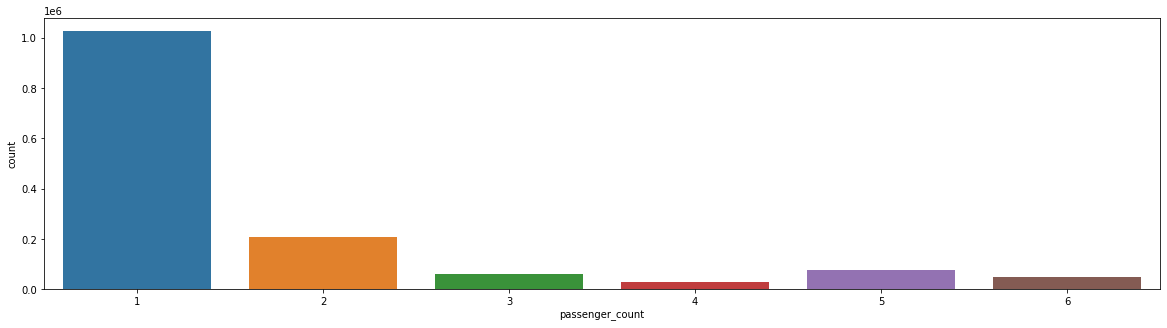

In [129]:
plt.figure(figsize = (20,5))
sns.countplot(taxi_df.passenger_count)
plt.show()

**Observation:**

As per above observations, it is to be noted that **highest amount** of trips were taken by a **single passenger** and large group of people travelling together is rare compared to single passenger.

## **Vendor**

Here we analyze taxi data only for the 2 vendors which are listed as 1 and 2 in the datset.

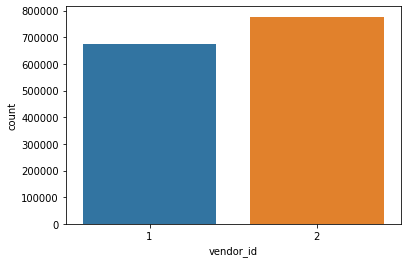

In [130]:
sns.countplot(taxi_df.vendor_id)
plt.show()

**Observation:**

Though both the vendors seems to have almost equal market share.**Vendor 2** Service provider is the **most opted one by New Yorkers**.

## **Distance**

Let's now have a look on the distribution of the distance across the different types of rides.

In [131]:
# Analyzing the Distance
taxi_df['distance'].value_counts()

0.00    4556
0.00      20
0.00      12
0.00       6
0.00       6
        ... 
1.58       1
0.43       1
3.81       1
0.56       1
1.13       1
Name: distance, Length: 1447077, dtype: int64

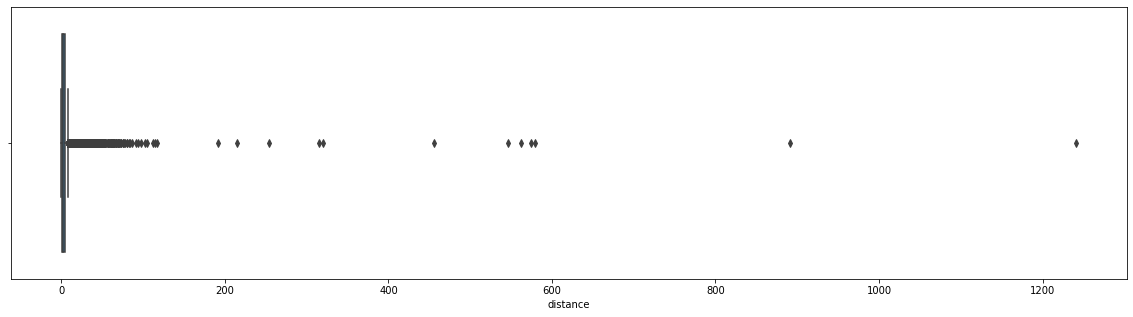

In [132]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.distance)
plt.show()

**Observation:**

There are some trips with over **100 km** distance and some trips with **0 km** distance.

The possible reasons for zero km trips can be:


*   The dropoff location couldn’t be tracked.
*   The passengers or driver cancelled the trip due to some or issue technical issue in software, etc.



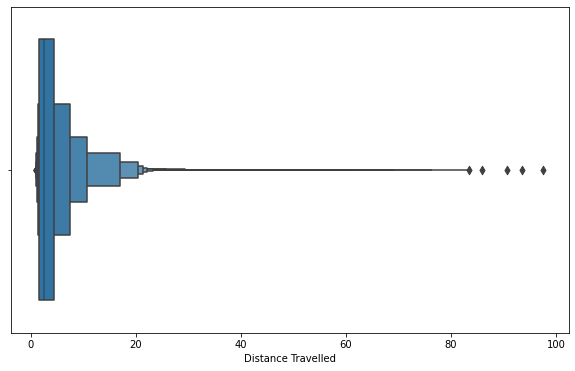

In [133]:
# Removing the outliers and updating the value
taxi_df = taxi_df[~(taxi_df.distance > 100)]
taxi_df = taxi_df[~(taxi_df.distance < 1)]

#Plotting the Boxenplot
plt.figure(figsize = (10,6))
sns.boxenplot(taxi_df.distance)
plt.xlabel('Distance Travelled')
plt.show()

## **Trip duration**

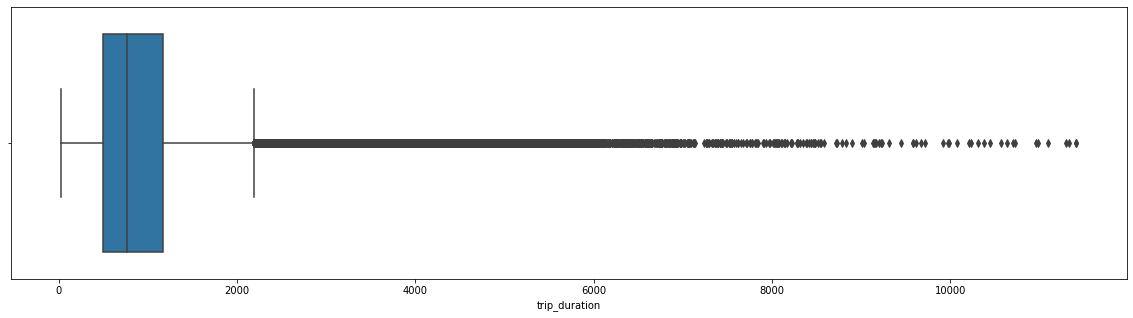

In [134]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.trip_duration)
plt.show()

Some trip durations are **over 100000 seconds** which are clear outliers and should be removed.

In [135]:
# To maintain the data consistency, we will remove these outliers,
# (trips with duration more than 5000 seconds and less than 60 seconds) 
taxi_df = taxi_df[taxi_df.trip_duration <= 5000]
taxi_df = taxi_df[taxi_df.trip_duration >= 60]

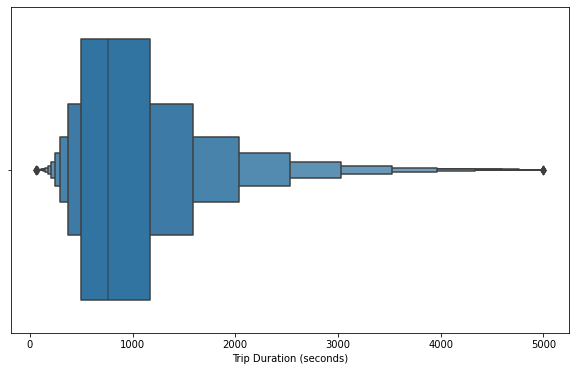

In [136]:
# Plotting for insights
plt.figure(figsize = (10,6))
sns.boxenplot(taxi_df.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

**Observation:**

Most of the trips durations took between **10-20 mins** to complete. As observed most of the trips took **0 - 30 mins** to complete(1800 seconds)

## **Speed**
**Speed** is a function of **distance and time**. Let's visualize speed in different trips.

In [137]:
taxi_df.speed.describe()

count   1209251.00
mean         15.24
std           7.80
min           0.78
25%           9.88
50%          13.55
75%          18.68
max         583.74
Name: speed, dtype: float64

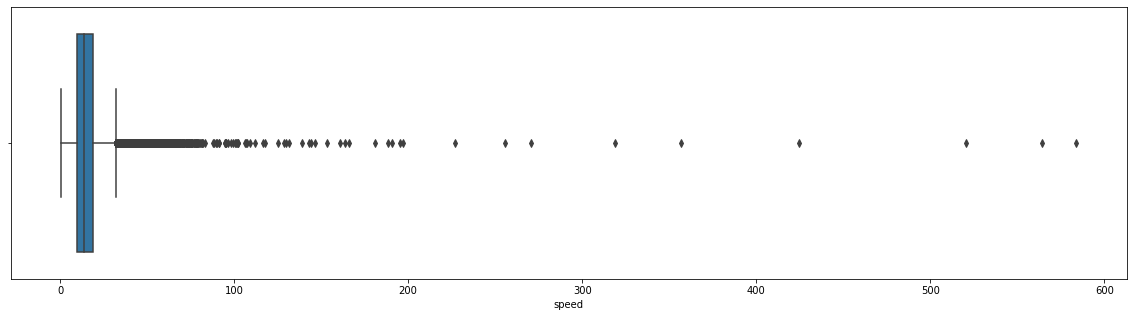

In [138]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi_df.speed)
plt.show()

Many trips were done at a speed of over **200 km/h**. Going SuperSonic..!!

As per the rule, the speed limit approx. **40km/h** in **New York City**. So having average speed of over **60km/h** is quite unreasonable.

In [139]:
# Averge speed less than 60
taxi_df = taxi_df[~(taxi_df.speed >60)]

Some observations showing that speeds which are **less than 1 km/hr** for a trip which is quite unreasonable.

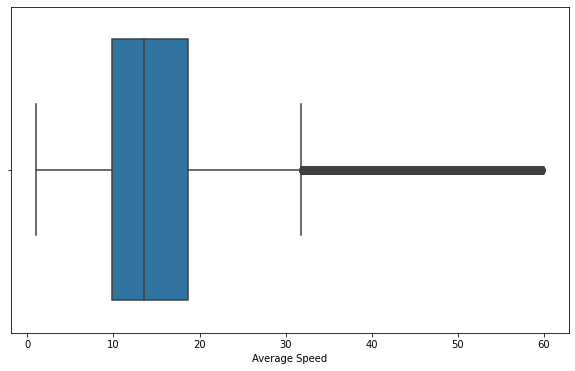

In [140]:
# Removing the data with less than avg 1km speed
taxi_df = taxi_df[~(taxi_df.speed <1)]

# Plotting of Boxplot
plt.figure(figsize = (10,6))
sns.boxplot(taxi_df.speed)
plt.xlabel('Average Speed')
plt.show()

## **Store_and_fwd_flag**

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

In [141]:
taxi_df.vendor_id[taxi_df.store_and_fwd_flag == 1].value_counts()

1    6785
Name: vendor_id, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

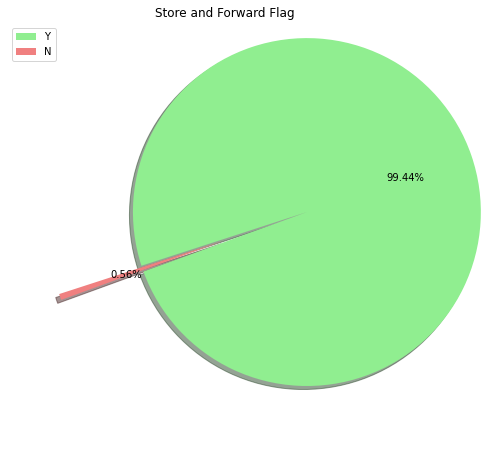

In [142]:
plt.figure(figsize=(8,8))
plt.pie(taxi_df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

**Observation:**

Visualization tells us that there were very **few trips** of which the records were stored in memory due to no connection to the server

## **Total trips Per Hour**

Let's take a look at the distribution of the pickups across the 24 hour time scale.

Text(0.5, 1.0, 'Hourly Pickups')

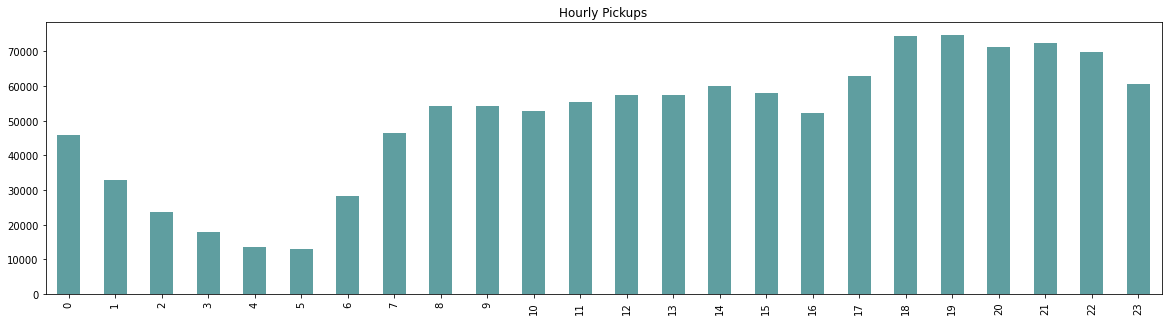

In [143]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = taxi_df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='cadetblue')
plt.title("Hourly Pickups")

***In which hour we get to see maximum pickups ? ***

 Rush hours (5 pm to 10 pm), probably office leaving time.

## **Total trips per weekday**

Let's take a look now at the distribution of taxi pickups across the week.

Text(0.5, 1.0, 'Overall Week day Trips')

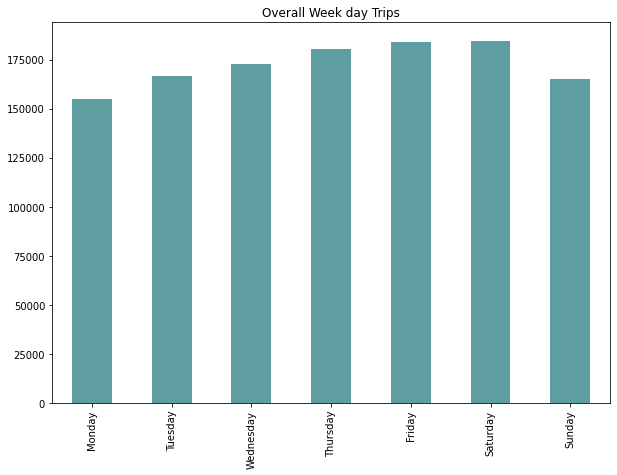

In [144]:
#Analyzing week day trips
plt.figure(figsize=(10,7))
pickup_week = taxi_df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='cadetblue')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

**Observation:**

Observations tells us that **Fridays and Saturdays** are those days in a week when New Yorkers prefer to rome in the city. GREAT !!

## **Total trips per month**

Let's take a look at the trip distribution across the months to understand if there is any diffrence in the taxi pickups in different months.

Text(0.5, 1.0, 'Overall Monthly trips')

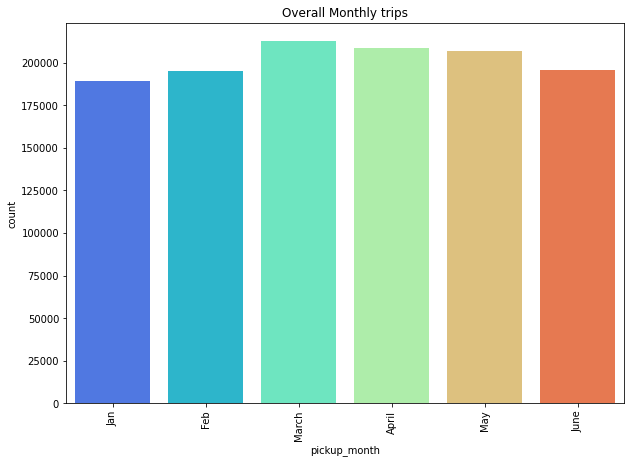

In [145]:
plt.figure(figsize=(10,7))
sns.countplot(taxi_df['pickup_month'], palette='rainbow')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

**Observation:**

-We've data of **6 months**.

-Number of trips in a particular month **March,April and May** marking the **highest**.

-**January** being **lowest** probably due to extreme SnowFall NYC.

## **Trip Duration per hour**

We need to aggregate the total trip duration to plot it agaist the month. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend.

Lets take a look.

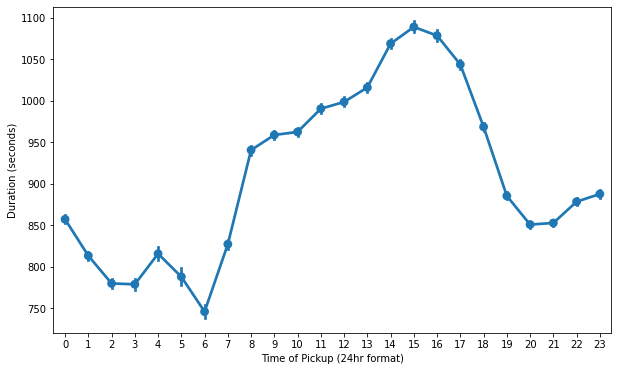

In [146]:
# Plotting for hour of pickup, trip duration
plt.figure(figsize = (10,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=taxi_df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

**Observations:**

Average trip duration is **lowest** at **6 AM** when there is minimal traffic on the roads.

Average trip duration is generally **highest** around **3 PM** during the busy streets.

Trip duration on an average is **similar** during early morning hours i.e. **before 6 AM** & late evening hours i.e. **after 6 PM.**

## **Trip duration per weekday**

Let's now analyze the pattern of trip duration during the week.

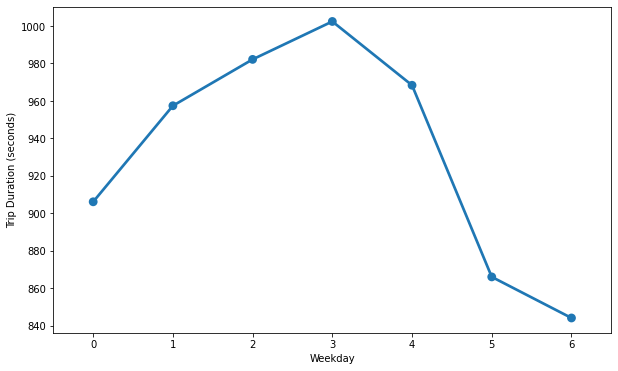

In [147]:
plt.figure(figsize = (10,6))
group2 = taxi_df.groupby('pickup_weekday').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

**Observations:**

We can see that trip duration is almost equally distributed across the week on a scale of **0-1000 minutes** with minimal difference in the duration times. 

Also, it is observed that trip duration on **thursday** is longest among all days.

## **Trip duration per month**

Let's take a look at the trip duration pattern with respect to the different months.

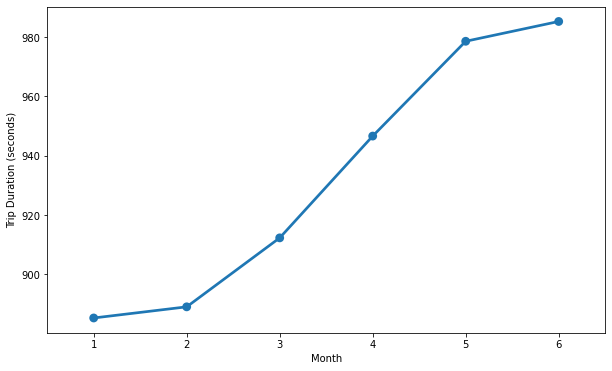

In [148]:
plt.figure(figsize = (10,6))
group3 = taxi_df.groupby('pickup_month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

**Observations:**

- We can see an **increasing trend** in the average trip duration along with each subsequent month.

- The duration difference between each month is not much. It has **increased** gradually over a **period of 6 months**.

- It is **lowest** during **february** when winters starts declining.

- There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the considered as the wettest month in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June.

## **Trip duration per vendor**

We can also look at the average difference between the trip duration for each vendor. However we do know that vendor 2 has larger share of the market. Let's visualize.

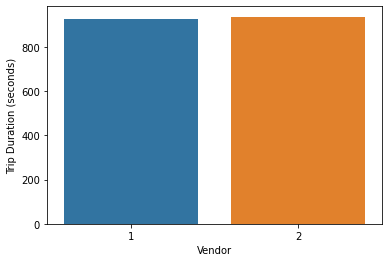

In [149]:
group4 = taxi_df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

**Observations:**

**Vendor 2** takes the crown. **Average trip duration** for **vendor 2** is **higher** than **vendor 1** by approx **200 seconds** i.e. atleast **3 minutes per trip**.

## **Trip duration v/s Flag**

Let's visualize if there is any effect of flag setting on the trip duration?

<Figure size 720x432 with 0 Axes>

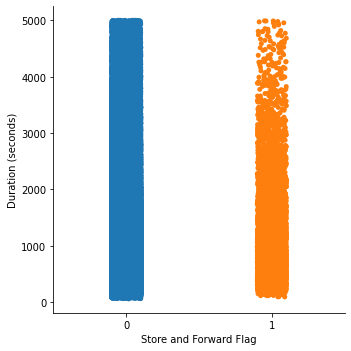

In [150]:
plt.figure(figsize = (10,6))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=taxi_df,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

There is **not much difference between N and Y**.

## **Distance per hour**

Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.


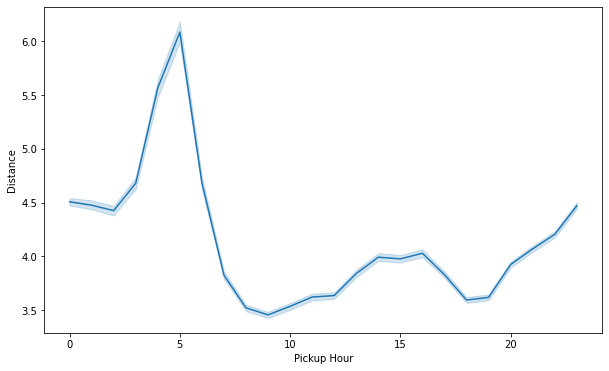

In [151]:
# plotting for distance to hour
plt.figure(figsize = (10,6))
sns.lineplot(y='distance',x='pickup_hour',data=taxi_df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

**Observations:**
- Trip distance is **highest** during **early morning hours** which can account for some things like:
  1. Outstation trips taken during the weekends.
  2.  Longer trips towards the city airport which is located in the outskirts of the city.
- Trip distance is fairly **equal** from **morning till the evening** varying around **3 - 3.5 kms**.
- It starts **increasing** gradually towards the **late night hours** starting from **evening till 5 AM** and **decrease** steeply towards **morning**.

## **Distance per Weekday**

Let's analyze the average trip distance covered on each day of the week.

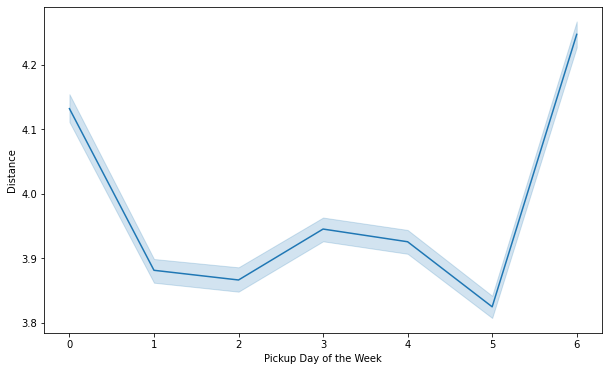

In [152]:
# Analyzing distance per weekday
plt.figure(figsize = (10,6))
sns.lineplot(x='pickup_weekday', y='distance',data=taxi_df)
plt.ylabel('Distance')
plt.xlabel('Pickup Day of the Week')
plt.show()

**Observations:**

So it's a fairly equal distribution with average distance metric varying around **3.5 km/h** with **Sunday** being **at the top** may be due to outstation trips or night trips towards the airport.

## **Distance per month**

Now we will look at the average trip distance covered per month.

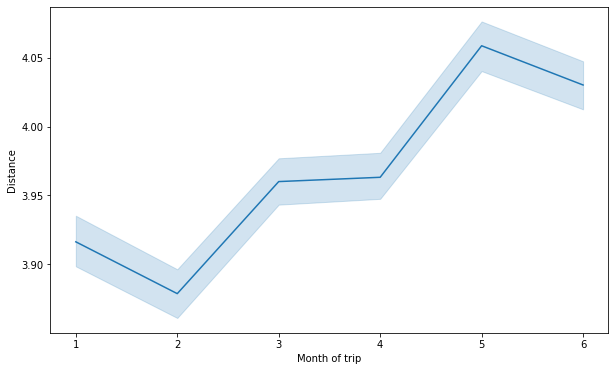

In [153]:
# Distance per month
plt.figure(figsize = (10,6))
sns.lineplot(x='pickup_month', y='distance',data=taxi_df)
plt.ylabel('Distance')
plt.xlabel('Month of trip')
plt.show()

**Observations:**

Here also the distibution is almost equivalent, varying mostly around **3.5 km/h** with **5th month** being the **highest** in the average distance and **2nd** month being the **lowest**.

## **Distance per vendor**

Let's check how both the vendors have covered the average distance during the trips

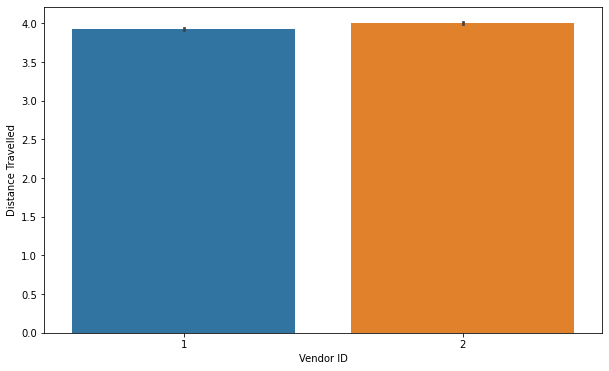

In [154]:
# Comparing distance and vendor
plt.figure(figsize = (10,6))
sns.barplot(y='distance',x='vendor_id',data=taxi_df,estimator=np.mean)
plt.ylabel('Distance Travelled')
plt.xlabel('Vendor ID')
plt.show()

**Observations:**
As shown in above, **Similar** distribution has been observed between **both the vendors**.

## **Distance and Store and Forward Flag**

<Figure size 720x432 with 0 Axes>

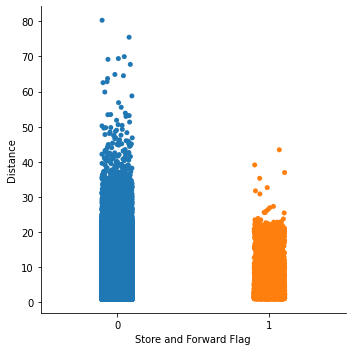

In [155]:
# Analyzing distance to store_frwd_flag
plt.figure(figsize = (10,6))
sns.catplot(y='distance',x='store_and_fwd_flag',data=taxi_df,kind='strip')
plt.ylabel('Distance')
plt.xlabel('Store and Forward Flag')
plt.show()

As **observed** for **longer distances** the trip is **not stored**.

## **Average speed per hour**

Let's look at the average speed of NYC Taxi per hour.

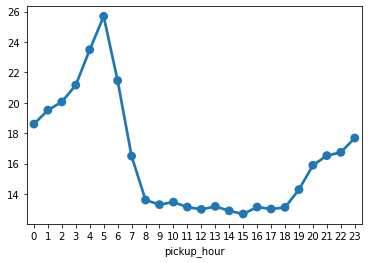

In [156]:
group9 = taxi_df.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.show()

**Observations:**
- The **average trend** is totally **inline** with the **normal circumstances**.
- **Average speed** tend to **increase** after **late evening** and continues to **increase** gradually till the late **early morning hours**.
- Average taxi **speed** is **highest** at **5 AM** in the morning, then it **declines** steeply as the **office hours approaches**.
- Average taxi **speed** is **more or less same** during the **office hours** i.e. from **8 AM till 6PM** in the evening

## **Average speed per weekday**

Let's visualize that on an average what is the speed of a taxi on any given weekday.

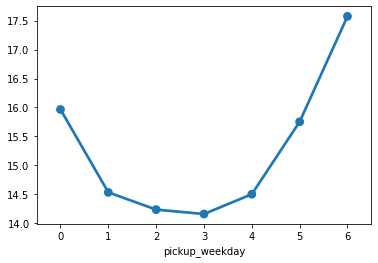

In [157]:
group10 = taxi_df.groupby('pickup_weekday').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.show()

**Observations:**
- Average taxi **speed** is **higher** on **weekend** as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.
- Even on **Monday** the average taxi **speed** is shown **higher** which is quite surprising when it is one of the most busiest day after the weekend. There can be several possibility for such behaviour
   1. Lot of customers who come back from outstation in early hours of Monday before 6 AM to attend office on time.
   2. Early morning hours customers who come from the airports after vacation to attend office/business on time for the coming week.
- There could be some more reasons as well which only a local must be aware of.
- We also can't deny the anomalies in the dataset. which is quite cumbersome to spot in such a large dataset.

## **Passenger count per vendor**

Let's try some different metric in the series i.e. passenger count. We will plot it agaist the vendor only because it will not be much helpful to plot it against hour, weekday or month like others as the passenger count should be a whole number and not a ratio.

We will take mean as the aggregate measure because we already did the outlier analysis on this metric. So our results woudn't be affected by some extreme values. Also if we take median than it will return only 1 because majorty of the trips have been taken by single passenger. Let's take a look about it's distribution.

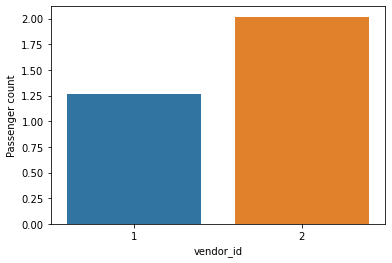

In [158]:
group9 = taxi_df.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.show()

Clear difference between the two operators for the average passenger count in all trips. It seems that vendor 2 trips generally consist of 2 passengers as compared to the vendor 1 with 1 passenger. Let's bifurcate it further.

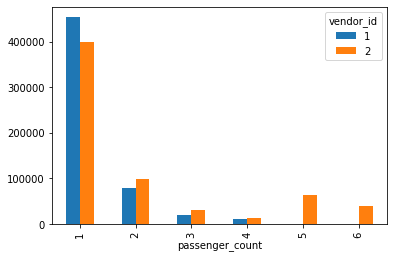

In [159]:
taxi_df.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

**Observations:**

It seems that most of the big cars are served by the **Vendor 2** including minivans because other than **passenger 1**, **vendor 2** has **majority** in serving **more than 1 passenger** count and that explains it greater share of the market.

# **Correlation Analysis**

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

## **Heatmap**

A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

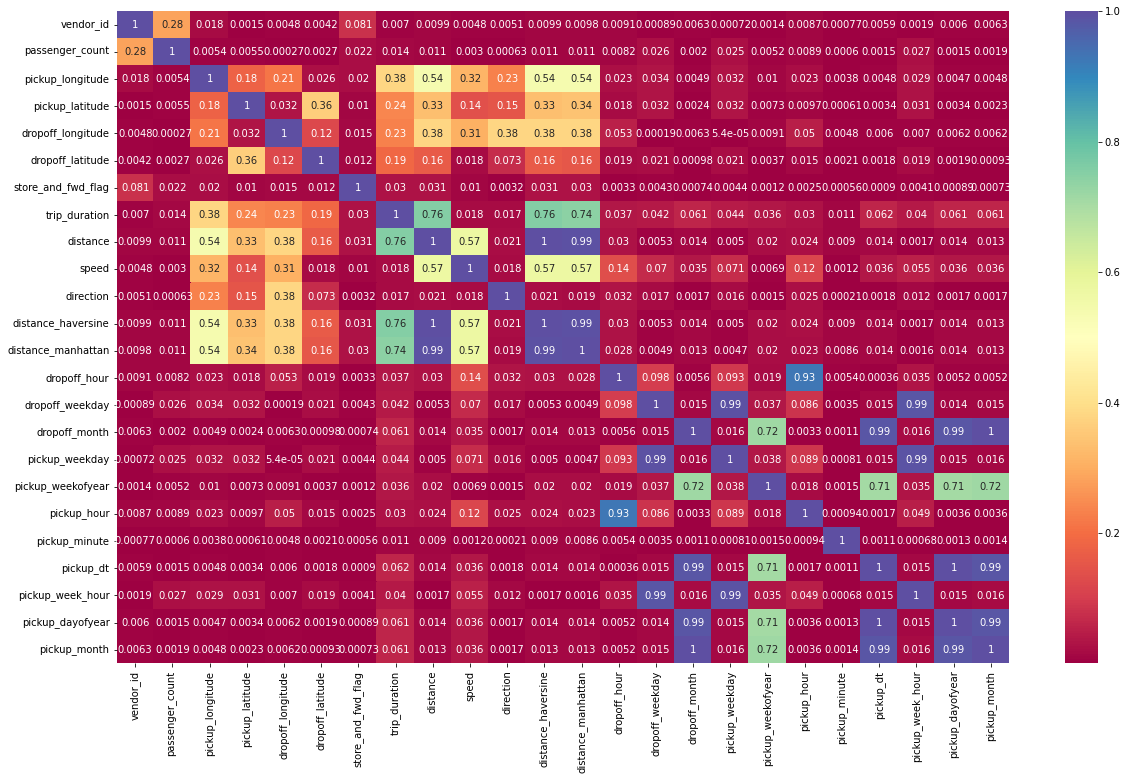

In [160]:
# Correalation analysis using heatmap
plt.figure (figsize= (20,12))
corelation= taxi_df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='Spectral')

# **Feature Engineering**

After looking at the dataset from different perspectives. Let's prepare our dataset before training our model. Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.

## **Normalization**

Let’s drop unwanted Features like ID and others of which we've already extracted features.

In [161]:
#dropping unwanted columns

taxi_df =df.drop(['id','pickup_datetime','dropoff_datetime'], axis=1)
taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,direction,distance_haversine,distance_manhattan
0,2,1,-73.98,40.77,-73.96,40.77,0,455,1.50,11.86,99.97,1.50,1.74
1,1,1,-73.98,40.74,-74.00,40.73,0,663,1.81,9.80,-117.15,1.81,2.43
2,2,1,-73.98,40.76,-74.01,40.71,0,2124,6.39,10.82,-159.68,6.39,8.20
3,2,1,-74.01,40.72,-74.01,40.71,0,429,1.49,12.47,-172.74,1.49,1.66
4,2,1,-73.97,40.79,-73.97,40.78,0,435,1.19,9.84,179.47,1.19,1.20


In [162]:
#Predictors and Target Variable

X = taxi_df.drop(['trip_duration'], axis=1)
y = np.log(taxi_df['trip_duration'])

**Normalizing** the Dataset using **Standard Scaling Technique**.

In [163]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,speed,direction,distance_haversine,distance_manhattan
0,0.94,-0.50,-0.09,0.60,0.16,0.42,-0.07,-0.55,-0.30,1.11,-0.55,-0.60
1,-1.07,-0.50,-0.06,-0.55,-0.38,-0.71,-0.07,-0.43,-0.59,-0.96,-0.43,-0.40
2,0.94,-0.50,-0.04,0.44,-0.47,-1.40,-0.07,1.27,-0.45,-1.37,1.27,1.28
3,0.94,-0.50,-0.52,-1.28,-0.58,-1.51,-0.07,-0.55,-0.22,-1.49,-0.55,-0.62
4,0.94,-0.50,0.06,1.59,0.03,0.98,-0.07,-0.66,-0.58,1.86,-0.66,-0.76


## **Principal Component Analysis (PCA)**

In [164]:
X = new_df

In [165]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([2.86330684e-01, 1.76347331e-01, 1.08856662e-01, 1.03853212e-01,
       8.97545282e-02, 8.24267158e-02, 5.87674467e-02, 5.47447968e-02,
       3.15268857e-02, 6.41800123e-03, 9.73736260e-04, 4.30486098e-28])

In [166]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([3.43597065e+00, 2.11616948e+00, 1.30628087e+00, 1.24623943e+00,
       1.07705510e+00, 9.89121292e-01, 7.05209862e-01, 6.56938028e-01,
       3.78322897e-01, 7.70160695e-02, 1.16848434e-02, 5.16583685e-27])

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

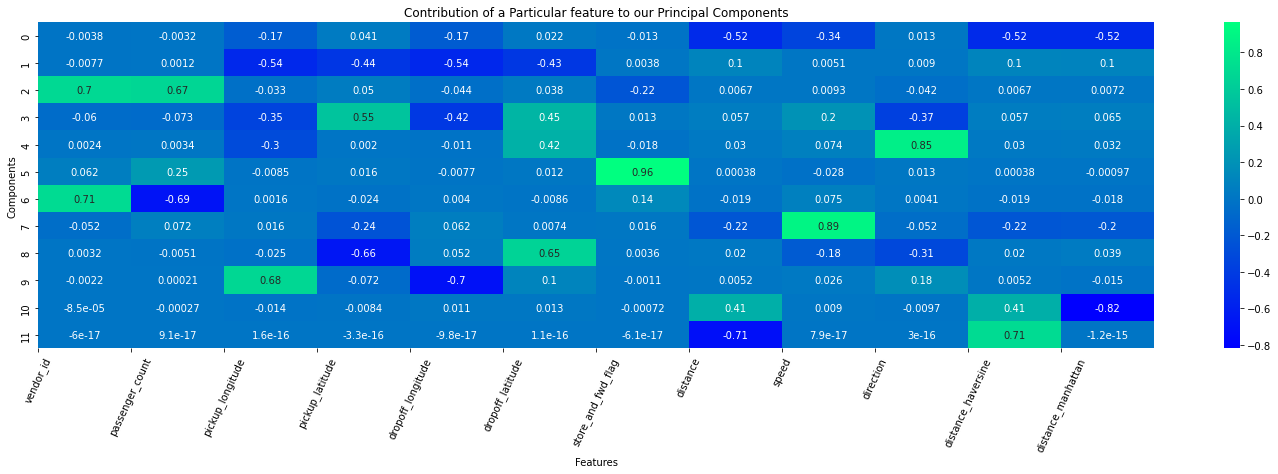

In [167]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')



*   Above plot gives us detailed idealogy of which feature has contributed **more or less** to our each Principal Component.
*   Pricipal Components are our new features which consists of Information from every other original Feature we have.
*   We **reduce the Dimensions** using **PCA** by retaining as much as Information possible.





## **Splitting Data and Choosing Algorithms**

Let’s pass the PCA Transformed data in our Machine Learning Regression Algorithms. To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).

In [168]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(taxi_df['trip_duration']).values

RMSLE as a evaluation Metrics , We can also hyper tune our Parameters to minimize the loss (RMSLE). We will also calculate Null RMSLE , which we can set as a benchmark for our Model's RMSLE.

In [169]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((985028, 12), (422156, 12), (985028,), (422156,))

## **Linear Regression**

In [170]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.24043732, 6.24821824, 6.00330064, ..., 6.48451498, 6.22361046,
       6.35349543])

In [171]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.433285759206894,
 array([-1.99615604e-01,  1.51912310e-01,  9.97821529e-03,  2.99123192e-02,
         1.66370250e-02,  1.36076908e-02, -4.89991895e-02, -5.58769537e-01,
         1.13671385e-01, -1.08003502e-01,  1.13205717e-01,  8.30899108e+09]))

In [172]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.7523496709552236
Validation Score :  0.6151063467389759
Cross Validation Score :  0.7522521514384252
R2_Score :  0.5675531856183462


Text(0.5, 1.0, 'Test VS Prediction')

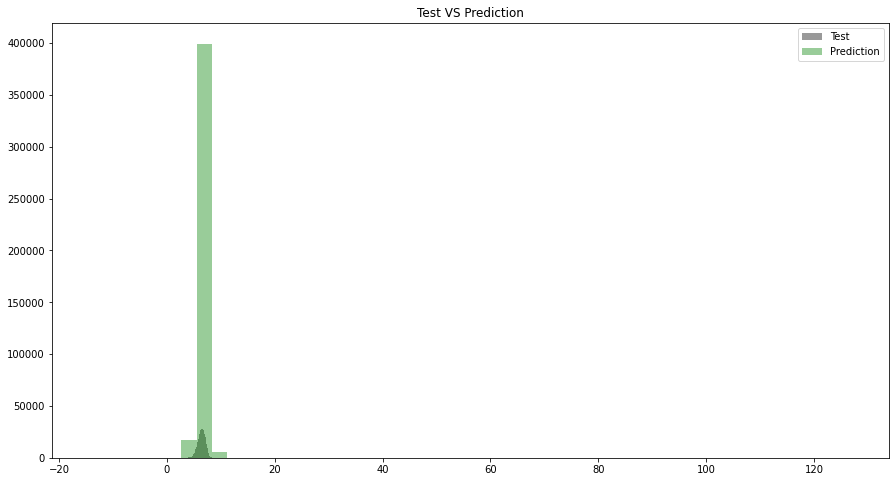

In [173]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

**Observations:**

* From the above visualization, we can clearly identify that the **Linear Regression** **isn't performing good**. 
* The **Actual Data (in Grey)** and **Predicted values (in Green)** are so much **differing**. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

**Null RMSLE**

Null RMSLE is the **RMSLE** that could be achieved by predicting the **mean response value**. It is a benchmark against which you may want to measure your regression model.

In [174]:
#null rmsle implementation

y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.09858077072602482


## **Decision Tree**

Let us apply Decision Tree on our data and see what prediction it does.

In [175]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.16326599, 6.52395172, 5.45109147, ..., 6.75123686, 6.43235118,
       6.32285363])

In [176]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.9483327459618526
Validation Score :  0.9441192084984733
Cross Validation Score :  0.9447897609677502
R2_Score :  0.9409828373008545
RMSLE :  0.02481080702201472


Our Goal is to **reduce the value of loss function** (RMSLE) **as much as possible **considering NULL RMSLE into account.

Text(0.5, 1.0, 'Test VS Prediction')

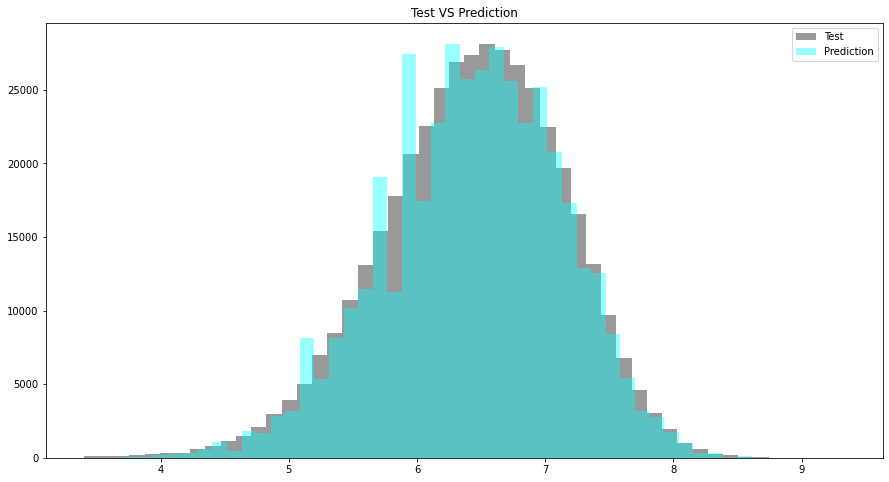

In [177]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

**Observations:**

* From the above visualization, we can clearly identify that the **Decision Tree Algorithm is performing good**. 
* The **Actual Data (in Grey)** and **Predicted values (in blue)** are **as close as possible**. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

## **Random Forest**

Now, Let us also try Random Forest on our Data and see what do we get.

In [179]:
#random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([6.14118735, 6.59425391, 5.48858444, ..., 6.68457074, 6.35705588,
       6.28885421])

In [180]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9597163209483912
Validation Score :  0.9568385776124115
Cross Validation Score :  0.9565367249699573
R2_Score :  0.9536823594301289
RMSLE :  0.021917488991222495


Text(0.5, 1.0, 'Test VS Prediction')

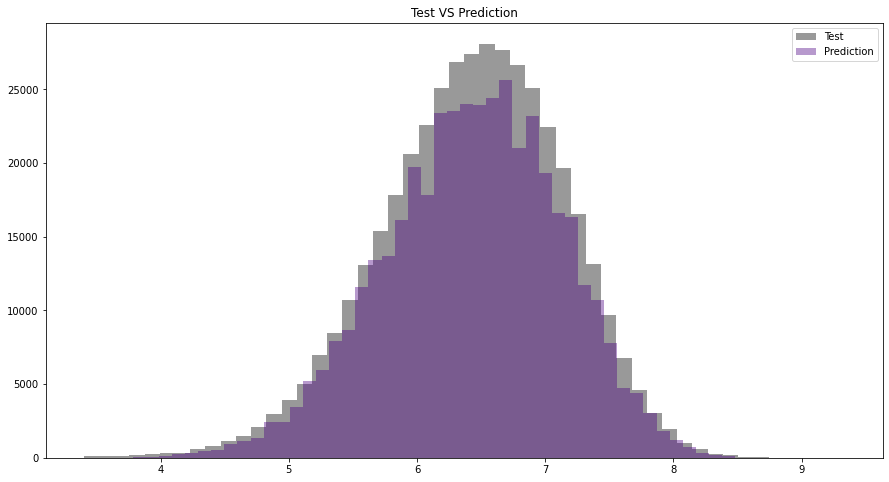

In [181]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

**Observations:**

* From the above visualization, we can clearly identify that the **Random Forest Algorithm is also performing good**. 
* The **Actual Data (in Grey)** and **Predicted values (in voilet)** are **as close as** possible. We can conclude that **Random Forest could be a good choice for Trip duration prediction.**
* Similarly, we can Hyper tune Random Forest to get the most out of it.

## **R2 Scores Evaluation**

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x504 with 0 Axes>

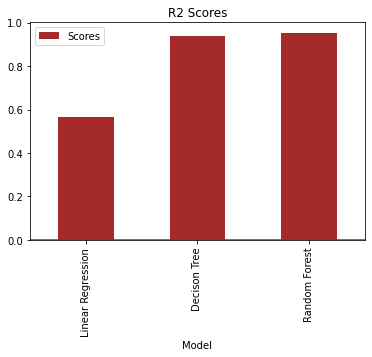

In [182]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

Although , our Evaluation Metric **isn't R2 Score** but I'm just plotting them to check the Good Fit.
We're getting **good fit score for Decision Tree and Random Forest** , i.e, close to **1.0**.

## **RMSLE Evaluation**

Text(0.5, 1.0, 'RMSLE - Lesser is Better')

<Figure size 720x720 with 0 Axes>

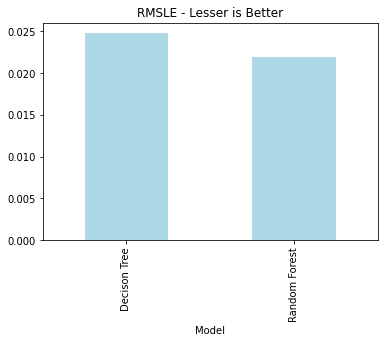

In [189]:
#RMSLE plot

plt.figure(figsize=(10,10))
r2 = pd.DataFrame({'RMSLE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="lightblue", legend=False)
plt.title("RMSLE - Lesser is Better")

 We can observe from above visualization, that our **Decision Tree model and Random Forest model are good performers**. As, **Random Forest is providing us reduced RMSLE**, we can say that it's a model to Opt for.

# **Conclusion:**

* It is to be noted that **highest amount** of trips were taken by a **single passenger** and **large group of people** travelling together is rare compared to single passenger.

* Observed that  **Vendor 2**  taxi service provider is **most Frequently used** by **New Yorkers**.

*  As observed most of the trips took **0 - 30 mins to complete** (1800 seconds).
* There were very **few trips** of which the records were **not stored** in memory due to no connection to the server.
* The **rush hours** are **5 pm to 10 pm**, probably because they are office leaving time. 
* Number of trips in a particular month **March,April and May** marking the **highest**.

* **Average trip duration** is **lowest at 6 AM** when there is minimal traffic on the roads and is generally **highest** around **3 PM** during the busy streets.
* Trip duration on an average is **similar** during early morning hours i.e. before **6 AM** & late evening hours i.e. after **6 PM.**
* We can see that trip duration is almost **equally distributed across the week on a scale of 0-1000 minutes** with minimal difference in the duration times.
Also, it is observed that **trip duration on thursday is longest** among all days.
* **Monthly trip analysis** gives us a insight of Month – **March and April **marking the **highest** number of Trips while **January marking lowest**, possibly due to Snowfall.





---



# **So,which algorithm is better - Decision Tree or Random Forest ?**

>*  One problem that might occur with **Decision Tree is that it can overfit**.

>*   Difference is - **A random forest is a collection of decision trees**.

>*    A **decision tree model** considers **all the features which makes it memorize everything**, it gets **overfitted on training data** which **couldn't predict well on unseen data**.

>* A **random forest** **chooses few number of rows at random** and **interprets results** from all the Tress and **combines** it to get more **accurate and stable final result**.

>* To predict the trip duration for a particular taxi, we can conclude that **Random Forest is the best models as compare to the other models**.